In [1]:
pip install optax dm-haiku

Note: you may need to restart the kernel to use updated packages.


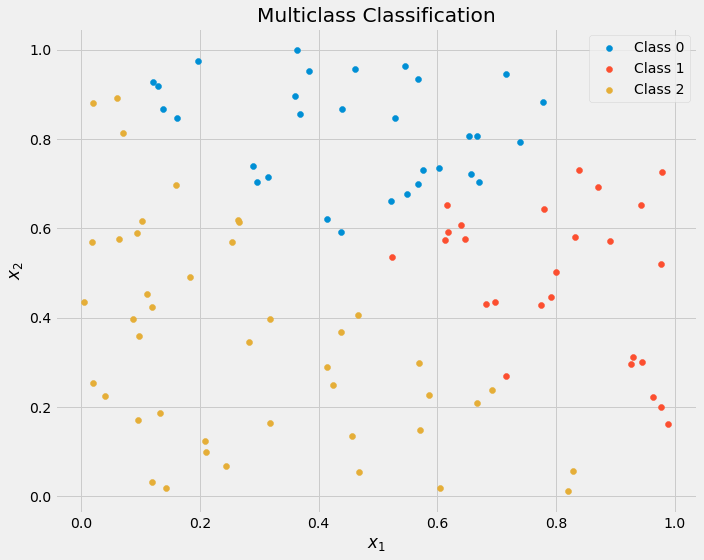

In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt
import optax
import haiku as hk
plt.style.use('fivethirtyeight')

# Data
x1 = np.array([0.5488135, 0.71518937, 0.60276338, 0.54488318, 0.4236548,
               0.64589411, 0.43758721, 0.891773, 0.96366276, 0.38344152,
               0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
               0.0871293, 0.0202184, 0.83261985, 0.77815675, 0.87001215,
               0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
               0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
               0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898,
               0.6176355, 0.61209572, 0.616934, 0.94374808, 0.6818203,
               0.3595079, 0.43703195, 0.6976312, 0.06022547, 0.66676672,
               0.67063787, 0.21038256, 0.1289263, 0.31542835, 0.36371077,
               0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
               0.16130952, 0.65310833, 0.2532916, 0.46631077, 0.24442559,
               0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
               0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
               0.97645947, 0.4686512, 0.97676109, 0.60484552, 0.73926358,
               0.03918779, 0.28280696, 0.12019656, 0.2961402, 0.11872772,
               0.31798318, 0.41426299, 0.0641475, 0.69247212, 0.56660145,
               0.26538949, 0.52324805, 0.09394051, 0.5759465, 0.9292962,
               0.31856895, 0.66741038, 0.13179786, 0.7163272, 0.28940609,
               0.18319136, 0.58651293, 0.02010755, 0.82894003, 0.00469548])


x2 = np.array([0.67781654, 0.27000797, 0.73519402, 0.96218855, 0.24875314,
               0.57615733, 0.59204193, 0.57225191, 0.22308163, 0.95274901,
               0.44712538, 0.84640867, 0.69947928, 0.29743695, 0.81379782,
               0.39650574, 0.8811032, 0.58127287, 0.88173536, 0.69253159,
               0.72525428, 0.50132438, 0.95608363, 0.6439902, 0.42385505,
               0.60639321, 0.0191932, 0.30157482, 0.66017354, 0.29007761,
               0.61801543, 0.4287687, 0.13547406, 0.29828233, 0.56996491,
               0.59087276, 0.57432525, 0.65320082, 0.65210327, 0.43141844,
               0.8965466, 0.36756187, 0.43586493, 0.89192336, 0.80619399,
               0.70388858, 0.10022689, 0.91948261, 0.7142413, 0.99884701,
               0.1494483, 0.86812606, 0.16249293, 0.61555956, 0.12381998,
               0.84800823, 0.80731896, 0.56910074, 0.4071833, 0.069167,
               0.69742877, 0.45354268, 0.7220556, 0.86638233, 0.97552151,
               0.85580334, 0.01171408, 0.35997806, 0.72999056, 0.17162968,
               0.52103661, 0.05433799, 0.19999652, 0.01852179, 0.7936977,
               0.22392469, 0.34535168, 0.92808129, 0.7044144, 0.03183893,
               0.16469416, 0.6214784, 0.57722859, 0.23789282, 0.934214,
               0.61396596, 0.5356328, 0.58990998, 0.73012203, 0.311945,
               0.39822106, 0.20984375, 0.18619301, 0.94437239, 0.7395508,
               0.49045881, 0.22741463, 0.25435648, 0.05802916, 0.43441663])


y = np.array([0., 1., 0., 0., 2., 1., 0., 1., 1., 0., 1., 0., 0., 1., 2., 2., 2.,
              1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 1., 0., 2., 2., 1., 2., 2.,
              2., 1., 1., 1., 1., 1., 0., 2., 1., 2., 0., 0., 2., 0., 0., 0., 2.,
              0., 1., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 2., 2.,
              1., 2., 1., 2., 1., 2., 0., 2., 2., 0., 0., 2., 2., 0., 2., 2., 0.,
              2., 1., 2., 0., 1., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2.])

X = np.column_stack([x1, x2])


plt.figure(figsize=[10, 8])
plt.scatter(x1[y == 0], x2[y == 0])
plt.scatter(x1[y == 1], x2[y == 1])
plt.scatter(x1[y == 2], x2[y == 2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.title('Multiclass Classification')
plt.tight_layout()

In [7]:
import jax.numpy as jnp
import jax


def nnet(X):
    out = hk.Linear(64)(X)
    out = jax.nn.relu(out)

    out = hk.Linear(3)(out)

    out = jax.nn.softmax(out)
    out = jnp.squeeze(out)
    return out


init, nnet = hk.without_apply_rng(hk.transform(nnet))
rng = jax.random.PRNGKey(0)
Θ = init(rng, X[0])

In [8]:
#So fucking convinient
#So fucking convinient
#So fucking convinient
#So fucking convinient
#So fucking convinient
#So fucking convinient

y_one_hot = jax.nn.one_hot(y, num_classes=3)

In [9]:
lr = 1e-3
optimizer = optax.adam
opt_state = optimizer(lr).init(Θ)

# Classification problems utilize "Cross Entrophy" as their Loss Function.
def CE(prob, y_one_hot):
    from jax.scipy.special import xlogy
    return -xlogy(y_one_hot, prob).sum()


#Minimize the Cross Entrophy useing grdient descent
@jax.jit
def update(Θ, opt_state):
    def L(Θ):
        prob = nnet(Θ, X)
        return CE(prob, y_one_hot)

    grads = jax.grad(L)(Θ)
    updates, opt_state = optimizer(lr).update(
        grads, opt_state)  # Gradient descent happens
    Θ = optax.apply_updates(Θ, updates)
    return Θ,  opt_state

In [10]:
for iteration in range(100):
    Θ, opt_state = update(Θ, opt_state)

In [11]:
prob = nnet(Θ, X)
prediction = jnp.argmax(prob, axis=1)
print("The probabiliity is", (prediction == y).mean(), ".") #看正確率

The probabiliity is 0.76 .
